In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error
import numpy as np
#pd.set_option('display.max_rows', 1000)
pd.options.display.max_columns = 100

In [2]:
df_energy = pd.read_csv('train.csv')
df_energy.head(10)
df_test = pd.read_csv('test.csv')
df_test.head()

,Observation,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,50001,21.100000,39.90,19.290000,41.260000,21.500000,40.700000,18.89,41.200000,18.088889,52.080000,3.200000,92.500000,19.20,38.610556,21.600000,47.090000,18.100000,44.90,2.70,733.633333,98.166667,2.0,34.833333,2.43
1,50002,22.600000,39.03,20.790000,40.463333,22.290000,38.290000,20.29,36.700000,20.760000,43.666667,7.690000,45.256667,20.50,35.290000,23.760000,39.266667,19.390000,37.50,7.27,756.666667,82.000000,2.0,40.000000,4.40
2,50003,21.000000,35.59,19.790000,34.900000,21.166667,35.833333,20.39,33.090000,18.000000,45.700000,7.190000,25.466667,21.10,26.478000,22.600000,34.126667,18.200000,39.79,6.05,751.250000,50.000000,6.5,34.500000,-3.70
3,50004,20.566667,37.59,20.566667,35.700000,20.166667,37.000000,22.00,35.326667,17.700000,45.400000,8.960000,32.663333,19.79,30.926667,20.666667,36.966667,18.000000,41.29,9.35,758.716667,58.333333,1.0,25.166667,1.48
4,50005,21.500000,38.70,18.566667,42.030000,22.500000,38.900000,20.00,39.000000,19.633333,48.826667,2.966667,65.263333,20.20,33.790000,23.390000,45.326667,20.133333,43.20,3.03,758.850000,95.000000,2.0,60.333333,2.25


In [3]:
df_energy.set_index('Observation')
df_test.set_index('Observation')

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
Observation,,,,,,,,,,,,,,,,,,,,,,,,
50001,21.100000,39.900000,19.290000,41.260000,21.500000,40.700000,18.890000,41.200000,18.088889,52.080000,3.200000,92.500000,19.200000,38.610556,21.600000,47.090000,18.100000,44.900000,2.70,733.633333,98.166667,2.000000,34.833333,2.4300
50002,22.600000,39.030000,20.790000,40.463333,22.290000,38.290000,20.290000,36.700000,20.760000,43.666667,7.690000,45.256667,20.500000,35.290000,23.760000,39.266667,19.390000,37.500000,7.27,756.666667,82.000000,2.000000,40.000000,4.4000
50003,21.000000,35.590000,19.790000,34.900000,21.166667,35.833333,20.390000,33.090000,18.000000,45.700000,7.190000,25.466667,21.100000,26.478000,22.600000,34.126667,18.200000,39.790000,6.05,751.250000,50.000000,6.500000,34.500000,-3.7000
50004,20.566667,37.590000,20.566667,35.700000,20.166667,37.000000,22.000000,35.326667,17.700000,45.400000,8.960000,32.663333,19.790000,30.926667,20.666667,36.966667,18.000000,41.290000,9.35,758.716667,58.333333,1.000000,25.166667,1.4800
50005,21.500000,38.700000,18.566667,42.030000,22.500000,38.900000,20.000000,39.000000,19.633333,48.826667,2.966667,65.263333,20.200000,33.790000,23.390000,45.326667,20.133333,43.200000,3.03,758.850000,95.000000,2.000000,60.333333,2.2500
50006,22.290000,37.126667,20.150000,39.090000,23.500000,37.790000,22.700000,35.000000,20.390000,43.290000,10.066667,13.333333,22.000000,36.356000,22.463333,43.560000,20.323333,40.200000,9.97,759.866667,66.666667,4.000000,32.666667,4.0000
50007,21.890000,39.500000,20.790000,37.463333,22.500000,36.500000,22.600000,35.400000,20.290000,40.826667,10.823333,1.533333,20.600000,27.700000,22.390000,35.863333,20.463333,33.266667,11.20,762.300000,53.333333,5.333333,40.000000,1.9700
50008,20.533333,38.863333,19.390000,39.090000,20.200000,40.700000,20.500000,37.863333,17.600000,66.182857,-5.674444,82.665556,18.000000,33.205556,20.150000,43.590000,16.890000,39.090000,-4.70,756.600000,87.500000,1.000000,64.500000,-6.4500
50009,21.390000,39.230000,21.860000,38.833333,21.926667,37.500000,20.500000,39.200000,19.890000,44.060000,7.793333,68.290000,20.133333,33.663333,23.290000,42.000000,20.390000,39.163333,5.37,760.933333,90.500000,1.833333,62.166667,3.8800


In [4]:
df_energy.describe(include = 'all')

,Observation,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy
count,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000,15780.000000
mean,9000.500000,21.683008,40.263077,20.339386,40.426604,22.265359,39.242550,20.853829,39.037623,19.591562,50.885670,7.912443,54.605411,20.270270,35.396466,22.028809,42.934090,19.489357,41.559527,7.414789,755.514104,79.756982,4.041824,38.378577,3.765539,97.294043
std,4555.437959,1.613157,3.983819,2.199896,4.085470,2.013391,3.247703,2.046331,4.337781,1.849086,8.977398,6.093002,31.146665,2.115302,5.099591,1.960959,5.223342,2.020488,4.135306,5.321081,7.385701,14.877160,2.447902,11.810273,4.202025,100.932234
min,1111.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.030000,1.000000,15.390000,23.200000,16.362222,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,10.000000
25%,5055.750000,20.730000,37.360000,18.790000,37.890000,20.790000,36.900000,19.500000,35.530000,18.270000,45.371518,3.661667,30.190000,18.700000,31.500000,20.790000,39.066667,18.000000,38.530000,3.680000,750.933333,70.166667,2.000000,29.000000,0.900000,50.000000
50%,9000.500000,21.600000,39.663333,20.000000,40.500000,22.100000,38.560000,20.666667,38.433333,19.390000,49.086111,7.333333,55.267083,20.050000,34.863333,22.100000,42.376214,19.390000,40.900000,6.930000,756.100000,83.666667,3.666667,40.000000,3.470000,60.000000
75%,12945.250000,22.600000,43.090000,21.530000,43.290000,23.290000,41.760000,22.100000,42.193333,20.633333,53.590000,11.239107,83.261667,21.600000,39.000000,23.390000,46.560000,20.600000,44.363333,10.400000,760.900000,91.666667,5.500000,40.000000,6.550000,100.000000
max,16890.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.745000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,850.000000


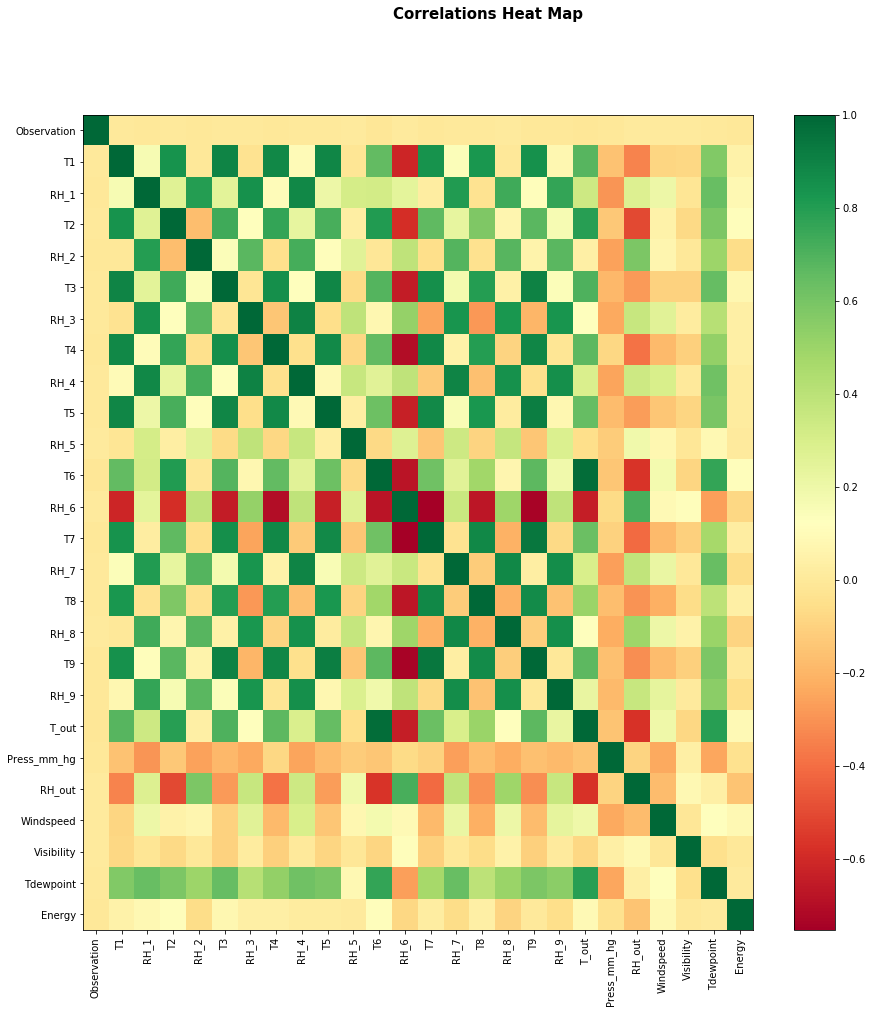

In [5]:
corr = df_energy.corr()

plt.figure(figsize=(15, 15))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()

In [6]:
df_energy.corr()['Energy'].sort_values()

RH_out        -0.148250
RH_8          -0.094996
RH_6          -0.079497
RH_2          -0.060233
RH_7          -0.056142
RH_9          -0.054764
Press_mm_hg   -0.035648
Visibility    -0.003322
Observation   -0.000224
T9             0.005882
RH_5           0.010213
Tdewpoint      0.012949
T5             0.015011
RH_4           0.015527
T7             0.021311
RH_3           0.034955
T8             0.036721
T4             0.036973
T1             0.052003
T3             0.077231
RH_1           0.084061
Windspeed      0.085429
T_out          0.094884
T6             0.113442
T2             0.116316
Energy         1.000000
Name: Energy, dtype: float64

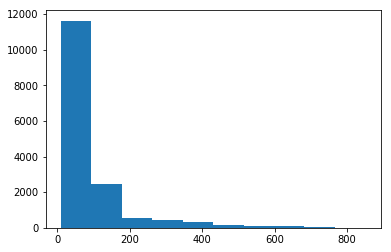

In [7]:
plt.hist(df_energy['Energy'])
plt.show()

In [8]:
df_energy['Energy'].skew()

3.2970817677063544

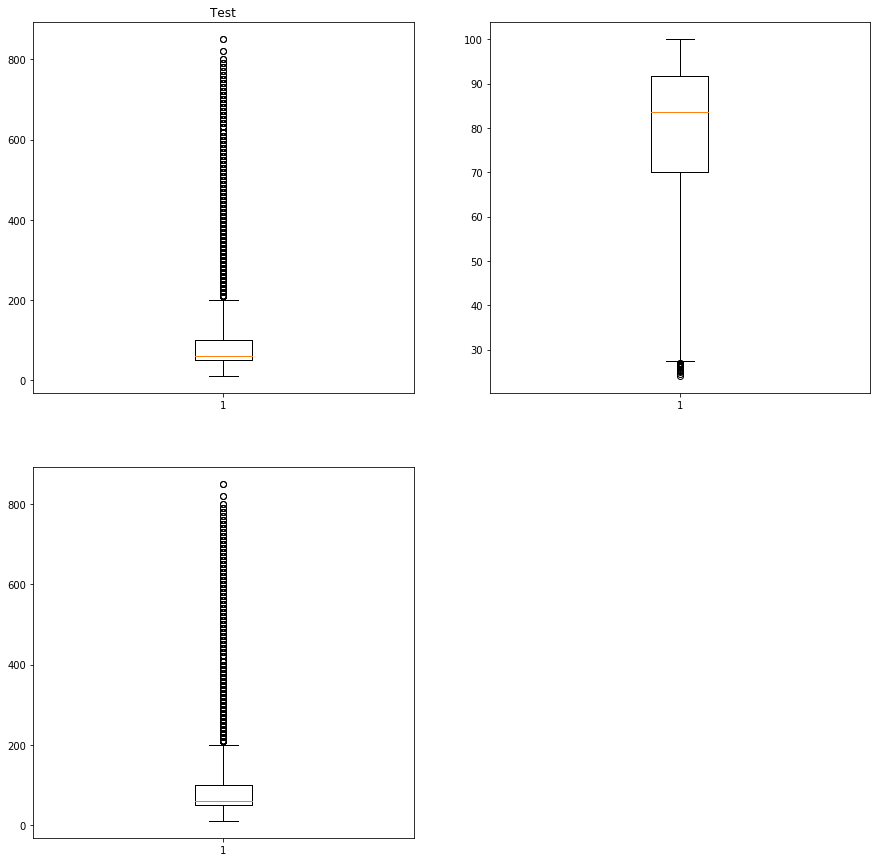

In [9]:
plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
plt.title('Test')
plt.boxplot(df_energy.Energy, whis = 2)

plt.subplot(2,2,2)
plt.boxplot(df_energy.RH_out, whis = 2)

plt.subplot(223)
plt.boxplot(df_energy.Energy, whis = 2)
plt.show()

In [14]:
df_energy['T_inside'] = df_energy[['T1','T2','T3','T4','T5','T6','T7','T8','T9']].mean(axis = 1)
df_energy['T_inside'].head()

df_test['T_inside'] = df_test[['T1','T2','T3','T4','T5','T6','T7','T8','T9']].mean(axis = 1)
df_test['T_inside'].head()

0    17.885432
1    19.785556
2    18.826296
3    18.712963
4    18.765556
Name: T_inside, dtype: float64

In [15]:
df_energy['RH_inside'] = df_energy[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9']].mean(axis = 1)
df_energy['RH_inside'].head()

df_test['RH_inside'] = df_test[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9']].mean(axis = 1)
df_test['RH_inside'].head()

0    48.693395
1    39.495926
2    34.552741
3    36.984815
4    43.892963
Name: RH_inside, dtype: float64

In [16]:
#RH_insideX_train = df_energy.drop(['Energy','T1','T2','T3','T4','T5','T6','T7','T8','T9','RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9'], axis = 1)
X_train = df_energy.drop(['Energy','T_inside','RH_inside', 'Visibility',], axis = 1)
X_train.describe()

Y_train = df_energy.Energy

In [17]:
#X_test = df_test.drop(['T1','T2','T3','T4','T5','T6','T7','T8','T9','RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9'], axis = 1)
X_test = df_test.drop(['T_inside','RH_inside','Visibility'], axis = 1)
X_test.describe()

#Y_test = df_test.Energy

,Observation,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint
count,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000
mean,51973.000000,21.702361,40.250486,20.349257,40.403988,22.277661,39.244868,20.864581,38.987707,19.596671,51.217426,7.910602,54.612515,20.256882,35.361457,22.032220,42.951058,19.474918,41.529476,7.409727,755.546519,79.729994,4.032452,3.749376
std,1138.967734,1.576877,3.962458,2.166524,4.006750,1.972585,3.283784,2.028555,4.357695,1.827127,9.198162,6.078576,31.156629,2.088448,5.174193,1.936700,5.231970,1.990925,4.217670,5.307361,7.454600,15.006897,2.464655,4.168467
min,50001.000000,16.856667,27.926667,16.100000,20.833333,17.290000,30.396667,15.190000,28.926667,15.340000,30.030000,-6.065000,1.000000,15.390000,23.290000,16.306667,29.675000,14.890000,29.200000,-4.980000,729.366667,25.000000,0.000000,-6.520000
25%,50987.000000,20.790000,37.326667,18.856667,37.915000,20.823333,36.820000,19.600000,35.530000,18.290000,45.560000,3.590000,29.163333,18.700000,31.390000,20.785000,39.067500,18.000000,38.500000,3.600000,750.933333,70.500000,2.000000,0.900000
50%,51973.000000,21.600000,39.626667,20.000000,40.500000,22.100000,38.500000,20.633333,38.326667,19.390000,49.163333,7.190000,55.290000,20.000000,34.860000,22.133333,42.369444,19.390000,40.863333,6.900000,756.100000,83.666667,3.666667,3.330000
75%,52959.000000,22.600000,43.030000,21.430000,43.210000,23.290000,41.790000,22.100000,42.090000,20.600000,53.997143,11.263333,82.933333,21.600000,39.000000,23.373333,46.500000,20.533333,44.290000,10.400000,761.100000,91.666667,5.500000,6.670000
max,53945.000000,26.200000,59.633333,29.200000,53.626667,29.198571,49.656667,26.100000,50.860000,25.795000,94.986111,28.200000,99.900000,25.926667,51.197778,27.200000,58.730000,24.500000,53.326667,26.000000,772.266667,100.000000,13.000000,15.000000


In [18]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_train, Y_train, random_state = 1)

In [19]:
clf_linear = LinearRegression()
clf_linear.fit(X_train1, Y_train1)
res = clf_linear.predict(X_test1)
print('Score', clf_linear.score(X_test1, Y_test1))
mean_absolute_error(Y_test1,res)
#np.savetxt('Submission.csv',[X_test.Observation, res])
#res.to_csv('Submission.csv')

Score 0.13273464124039103


54.237113360738476

In [121]:
from sklearn.ensemble import RandomForestClassifier

clf_random = RandomForestClassifier(n_estimators=50)
clf_random.fit(X_train1, Y_train1)
res_forest = clf_random.predict(X_test1)
print('Score', clf_random.score(X_test1, Y_test1))
mean_absolute_error(Y_test1,res_forest)

Score 0.2953105196451204


31.896070975918885

In [122]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
gbm = xgb.XGBRegressor(learning_rate =0.1,
 n_estimators=150,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27).fit(X_train1, Y_train1)

res_xgb = gbm.predict(X_test1)
print('Score', gbm.score(X_test1, Y_test1))
mean_absolute_error(Y_test1,res_xgb)

Score 0.37203084511738926


41.76425624020653

In [123]:
#Using average of Random Forest and XGBoost
ens = np.array([res_forest,res_xgb])
res_ens_mean = ens.mean(axis = 0)
mean_absolute_error(Y_test1,res_ens_mean)

32.99583803764314

In [45]:
#parameter tuning os xgBoost
params = {'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear'}

params['eval_metric'] = 'mae'

In [46]:
xgTrain = xgb.DMatrix(X_train1, label = Y_train1)
xgTest = xgb.DMatrix(X_test1, label = Y_test1)

In [55]:
xgb_train = xgb.train(params, xgTrain, num_boost_round = 999, early_stopping_rounds = 10   ,evals=[(xgTest, "Test_a")])

[0]	Test_a-mae:69.912
Will train until Test_a-mae hasn't improved in 10 rounds.
[1]	Test_a-mae:53.0084
[2]	Test_a-mae:45.6667
[3]	Test_a-mae:44.1024
[4]	Test_a-mae:43.6369
[5]	Test_a-mae:44.0856
[6]	Test_a-mae:44.3814
[7]	Test_a-mae:44.602
[8]	Test_a-mae:44.6011
[9]	Test_a-mae:44.8917
[10]	Test_a-mae:44.9507
[11]	Test_a-mae:44.7917
[12]	Test_a-mae:44.8399
[13]	Test_a-mae:44.5415
[14]	Test_a-mae:44.3731
Stopping. Best iteration:
[4]	Test_a-mae:43.6369



In [57]:
cv_xgboost = xgb.cv(params, xgTrain, num_boost_round = 999, early_stopping_rounds = 10, seed = 2, nfold = 10, metrics = {'mae'})

In [59]:
cv_xgboost['test-mae-mean'].min()

42.132969700000004

In [80]:
grid_cv_xgboost = [(i,j) for i in range(20,25) for j in range(5,7)]
min_mae = 99999999999999
best_params = None

In [81]:
for i,j in grid_cv_xgboost:
    params['max_depth'] = i
    params['min_child_weight'] = j
    
    cv_xgboost = xgb.cv(params, xgTrain, num_boost_round = 999, early_stopping_rounds = 10, seed = 2, nfold = 10, metrics = {'mae'})
    
    mae_run = cv_xgboost['test-mae-mean'].min()
    if min_mae > mae_run:
        min_mae = mae_run
        best_params = (i,j)
    print ('MAE for max_depth {}, min_child_weight {}: {}'.format(i,j,mae_run))
        
print(best_params, min_mae)

MAE for max_depth 20, min_child_weight 5: 34.807282900000004
MAE for max_depth 20, min_child_weight 6: 35.243415
MAE for max_depth 21, min_child_weight 5: 35.0462177
MAE for max_depth 21, min_child_weight 6: 35.1657642
MAE for max_depth 22, min_child_weight 5: 34.984328000000005
MAE for max_depth 22, min_child_weight 6: 35.224236999999995
MAE for max_depth 23, min_child_weight 5: 35.175622600000004
MAE for max_depth 23, min_child_weight 6: 35.3169824
MAE for max_depth 24, min_child_weight 5: 35.0805079
MAE for max_depth 24, min_child_weight 6: 35.1577174
(20, 5) 34.807282900000004


In [84]:
params['max_depth'] = 20
params['min_child_weight'] = 5 
params

{'colsample_bytree': 1,
 'eta': 0.3,
 'eval_metric': 'mae',
 'max_depth': 20,
 'min_child_weight': 5,
 'objective': 'reg:linear',
 'subsample': 1}

In [85]:
xgb_train_1 = xgb.train(params, xgTrain, num_boost_round = 999, early_stopping_rounds = 10   ,evals=[(xgTest, "Test_a")])

[0]	Test_a-mae:71.7653
Will train until Test_a-mae hasn't improved in 10 rounds.
[1]	Test_a-mae:55.5526
[2]	Test_a-mae:45.9332
[3]	Test_a-mae:40.3959
[4]	Test_a-mae:37.3924
[5]	Test_a-mae:35.9435
[6]	Test_a-mae:35.1239
[7]	Test_a-mae:34.9054
[8]	Test_a-mae:34.8551
[9]	Test_a-mae:35.0553
[10]	Test_a-mae:35.2108
[11]	Test_a-mae:35.3226
[12]	Test_a-mae:35.2624
[13]	Test_a-mae:35.3106
[14]	Test_a-mae:35.3486
[15]	Test_a-mae:35.4318
[16]	Test_a-mae:35.4267
[17]	Test_a-mae:35.4815
[18]	Test_a-mae:35.5537
Stopping. Best iteration:
[8]	Test_a-mae:34.8551



In [86]:
grid_cv_xgboost = [0.3, 0.2, 0.1]
min_mae = 99999999999999
best_params = None

for i in grid_cv_xgboost:
    params['eta'] = i
    
    cv_xgboost = xgb.cv(params, xgTrain, num_boost_round = 999, early_stopping_rounds = 10, seed = 2, nfold = 10, metrics = {'mae'})
    
    mae_run = cv_xgboost['test-mae-mean'].min()
    if min_mae > mae_run:
        min_mae = mae_run
        best_params = i
    print ('MAE for ETA {}: {}'.format(i,mae_run))
        
print(best_params, min_mae)

MAE for ETA 0.3: 34.807282900000004
MAE for ETA 0.2: 33.870914500000005
MAE for ETA 0.1: 33.3886646
MAE for ETA 0.05: 33.121342399999996
MAE for ETA 0.01: 33.0966295
MAE for ETA 0.005: 33.0777944
MAE for ETA 0.001: 45.3962933
0.005 33.0777944


In [124]:
params['eta'] = 0.1
params

{'colsample_bytree': 0.8,
 'eta': 0.1,
 'eval_metric': 'mae',
 'max_depth': 20,
 'min_child_weight': 5,
 'objective': 'reg:linear',
 'subsample': 1}

In [125]:
xgb_train_2 = xgb.train(params, xgTrain, num_boost_round = 999, early_stopping_rounds = 10   ,evals=[(xgTest, "Test_a")])

[0]	Test_a-mae:89.112
Will train until Test_a-mae hasn't improved in 10 rounds.
[1]	Test_a-mae:81.2593
[2]	Test_a-mae:73.9823
[3]	Test_a-mae:67.5724
[4]	Test_a-mae:62.0786
[5]	Test_a-mae:57.2309
[6]	Test_a-mae:53.0996
[7]	Test_a-mae:49.5162
[8]	Test_a-mae:46.4227
[9]	Test_a-mae:43.8052
[10]	Test_a-mae:41.7769
[11]	Test_a-mae:40.031
[12]	Test_a-mae:38.5234
[13]	Test_a-mae:37.3386
[14]	Test_a-mae:36.3208
[15]	Test_a-mae:35.5779
[16]	Test_a-mae:34.9492
[17]	Test_a-mae:34.4205
[18]	Test_a-mae:34.0235
[19]	Test_a-mae:33.6725
[20]	Test_a-mae:33.4408
[21]	Test_a-mae:33.2776
[22]	Test_a-mae:33.1368
[23]	Test_a-mae:33.008
[24]	Test_a-mae:32.9559
[25]	Test_a-mae:32.8763
[26]	Test_a-mae:32.8548
[27]	Test_a-mae:32.843
[28]	Test_a-mae:32.8261
[29]	Test_a-mae:32.83
[30]	Test_a-mae:32.8511
[31]	Test_a-mae:32.895
[32]	Test_a-mae:32.8722
[33]	Test_a-mae:32.9167
[34]	Test_a-mae:32.9488
[35]	Test_a-mae:32.9827
[36]	Test_a-mae:33.0193
[37]	Test_a-mae:33.0427
[38]	Test_a-mae:33.0792
Stopping. Best iteratio

In [101]:
grid_cv_xgboost = [(i/10,j/10) for i in range(8,11) for j in range(8,11)]
min_mae = 99999999999999
best_params = None

for i,j in grid_cv_xgboost:
    params['subsample'] = i
    params['colsample_bytree'] = j
    
    cv_xgboost = xgb.cv(params, xgTrain, num_boost_round = 999, early_stopping_rounds = 10, seed = 2, nfold = 10, metrics = {'mae'})
    
    mae_run = cv_xgboost['test-mae-mean'].min()
    if min_mae > mae_run:
        min_mae = mae_run
        best_params = (i,j)
    print ('MAE for subsample {}, colsample_bytree {}: {}'.format(i,j,mae_run))
        
print(best_params, min_mae)

MAE for subsample 0.8, colsample_bytree 0.8: 33.4267988
MAE for subsample 0.8, colsample_bytree 0.9: 33.5860145
MAE for subsample 0.8, colsample_bytree 1.0: 33.3204779
MAE for subsample 0.9, colsample_bytree 0.8: 32.9048299
MAE for subsample 0.9, colsample_bytree 0.9: 32.971985200000006
MAE for subsample 0.9, colsample_bytree 1.0: 33.0562267
MAE for subsample 1.0, colsample_bytree 0.8: 32.5577973
MAE for subsample 1.0, colsample_bytree 0.9: 32.6623825
MAE for subsample 1.0, colsample_bytree 1.0: 33.3886646
(1.0, 0.8) 32.5577973


In [102]:
params['subsample'] = 1
params['colsample_bytree'] = 0.8

In [126]:
xgb_train_2 = xgb.train(params, xgTrain, num_boost_round = 999, early_stopping_rounds = 10   ,evals=[(xgTest, "Test_a")])

[0]	Test_a-mae:89.112
Will train until Test_a-mae hasn't improved in 10 rounds.
[1]	Test_a-mae:81.2593
[2]	Test_a-mae:73.9823
[3]	Test_a-mae:67.5724
[4]	Test_a-mae:62.0786
[5]	Test_a-mae:57.2309
[6]	Test_a-mae:53.0996
[7]	Test_a-mae:49.5162
[8]	Test_a-mae:46.4227
[9]	Test_a-mae:43.8052
[10]	Test_a-mae:41.7769
[11]	Test_a-mae:40.031
[12]	Test_a-mae:38.5234
[13]	Test_a-mae:37.3386
[14]	Test_a-mae:36.3208
[15]	Test_a-mae:35.5779
[16]	Test_a-mae:34.9492
[17]	Test_a-mae:34.4205
[18]	Test_a-mae:34.0235
[19]	Test_a-mae:33.6725
[20]	Test_a-mae:33.4408
[21]	Test_a-mae:33.2776
[22]	Test_a-mae:33.1368
[23]	Test_a-mae:33.008
[24]	Test_a-mae:32.9559
[25]	Test_a-mae:32.8763
[26]	Test_a-mae:32.8548
[27]	Test_a-mae:32.843
[28]	Test_a-mae:32.8261
[29]	Test_a-mae:32.83
[30]	Test_a-mae:32.8511
[31]	Test_a-mae:32.895
[32]	Test_a-mae:32.8722
[33]	Test_a-mae:32.9167
[34]	Test_a-mae:32.9488
[35]	Test_a-mae:32.9827
[36]	Test_a-mae:33.0193
[37]	Test_a-mae:33.0427
[38]	Test_a-mae:33.0792
Stopping. Best iteratio

In [127]:
res_xgb_tuned = xgb_train_2.predict(xgTest)
#print('Score', xgb_train_2.score(X_test1, Y_test1))
mean_absolute_error(Y_test1,res_xgb_tuned)

33.079197280941806

In [128]:
clf_xgb_tuned = xgb.XGBRegressor(learning_rate =0.1,
 n_estimators=150,
 max_depth=20,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 n_jobs = 4,
 #nthread=4,
 #scale_pos_weight=1,
 seed=27).fit(X_train1, Y_train1)

In [129]:
res_xgb2_tuned = clf_xgb_tuned.predict(X_test1)
print('Score', clf_xgb_tuned.score(X_test1, Y_test1))
mean_absolute_error(Y_test1,res_xgb2_tuned)

Score 0.5233866765711428


33.57365469213372

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf_random2 = RandomForestClassifier(n_estimators = 60)
clf_random2.fit(X_train, Y_train)
res_forest2 = clf_random2.predict(X_test)
#print('Score', clf_random2.score(X_test2, Y_test1))
#mean_absolute_error(Y_test1,res_forest1)

In [130]:
clf_xgb = xgb.XGBRegressor(learning_rate =0.1,
 n_estimators=150,
 max_depth=20,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 n_jobs = 4,
 #nthread=4,
 #scale_pos_weight=1,
 seed=27).fit(X_train, Y_train)

res_xgb2 = clf_xgb.predict(X_test)


In [131]:
ens_final = np.array([res_forest2,res_xgb2])
res_ens_mean_final = ens_final.mean(axis = 0)


In [35]:
submission = pd.DataFrame({
    "Observation": X_test["Observation"],    
    "Energy": res_ens_mean_final      
    })
submission.to_csv('Submissions.csv', index=False, columns= ['Observation', 'Energy'])